<a href="https://colab.research.google.com/github/Sumit-Nayek/Data-Analytics-ans-Statistics-Assignment/blob/main/Code_mannual_assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

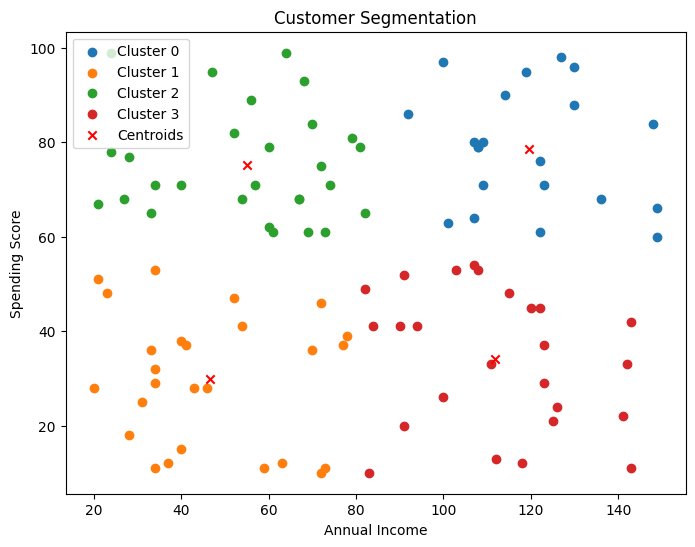

In [ ]:
## 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
annual_income = np.random.randint(20, 150, 100)
spending_score = np.random.randint(10, 100, 100)
data = pd.DataFrame({'Annual Income': annual_income, 'Spending Score': spending_score})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income'],
                data[data['Cluster'] == cluster]['Spending Score'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            color='red', marker='x', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


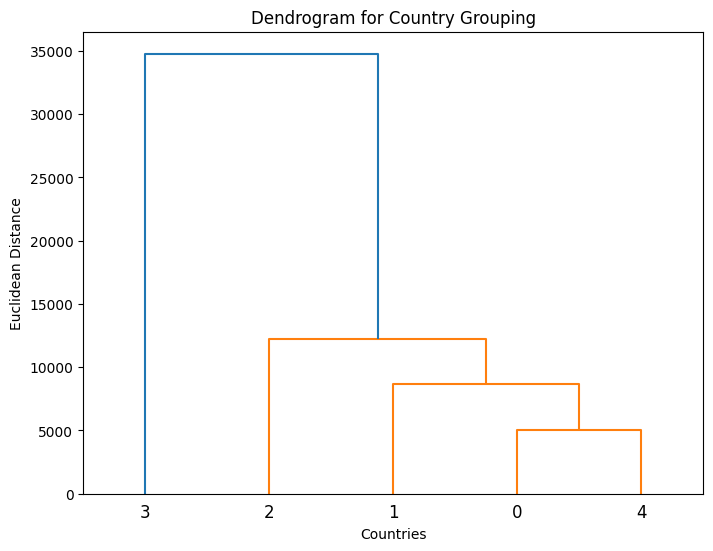

  Country  GDP per Capita  Life Expectancy  Literacy Rate  Cluster
0       A           20000               70             85        0
1       B           30000               80             90        0
2       C           15000               65             75        0
3       D           50000               85             95        1
4       E           25000               72             88        0


In [ ]:
## 2
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Sample socio-economic data
data = pd.DataFrame({
    'Country': ['A', 'B', 'C', 'D', 'E'],
    'GDP per Capita': [20000, 30000, 15000, 50000, 25000],
    'Life Expectancy': [70, 80, 65, 85, 72],
    'Literacy Rate': [85, 90, 75, 95, 88]
})

# Prepare data for clustering
features = data[['GDP per Capita', 'Life Expectancy', 'Literacy Rate']]

# Plot dendrogram
plt.figure(figsize=(8, 6))
dendrogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendrogram for Country Grouping')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
data['Cluster'] = hc.fit_predict(features)

# Print cluster assignments
print(data)



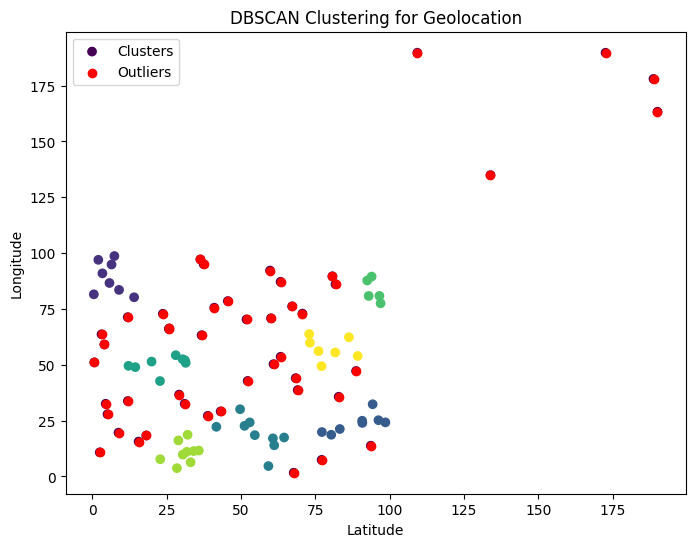

In [ ]:
## 3
from sklearn.cluster import DBSCAN

# Generate synthetic geolocation data
np.random.seed(42)
locations = np.random.rand(100, 2) * 100
locations[95:] += 100  # Adding outlier points

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(locations)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(locations[:, 0], locations[:, 1], c=clusters, cmap='viridis', label='Clusters')
plt.scatter(locations[clusters == -1, 0], locations[clusters == -1, 1], color='red', label='Outliers')
plt.title('DBSCAN Clustering for Geolocation')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()


In [ ]:
## 4
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Sample movie rating data
data = pd.DataFrame({
    'User': ['U1', 'U2', 'U3', 'U4', 'U5'],
    'Action': [5, 2, 4, 1, 5],
    'Romance': [1, 5, 2, 4, 1],
    'Drama': [3, 4, 3, 5, 2],
    'Comedy': [4, 1, 5, 2, 3]
})

# Prepare features
features = data.drop('User', axis=1)

# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
data['Cluster'] = hc.fit_predict(features)

# Print cluster assignments
print(data)


  User  Action  Romance  Drama  Comedy  Cluster
0   U1       5        1      3       4        0
1   U2       2        5      4       1        1
2   U3       4        2      3       5        0
3   U4       1        4      5       2        1
4   U5       5        1      2       3        0


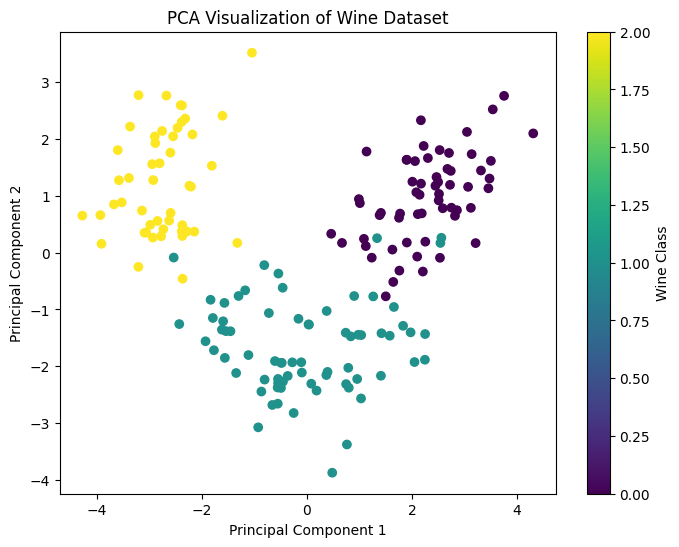

In [ ]:
## 5
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load wine dataset
wine = load_wine()
features = wine.data
target = wine.target

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=target, cmap='viridis')
plt.title('PCA Visualization of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Class')
plt.show()
